# Basic Regression Analysis (using Wall Mart Sales from 45 stores in 2010 - 2012) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from statsmodels.formula.api import ols

## Import files and do quick checks on data type and N.A values

In [2]:
df = pd.read_excel("Walmart_Store_sales.xlsx")

In [3]:
df
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [4]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## Check regression possibilities between Sales and Independent Variables

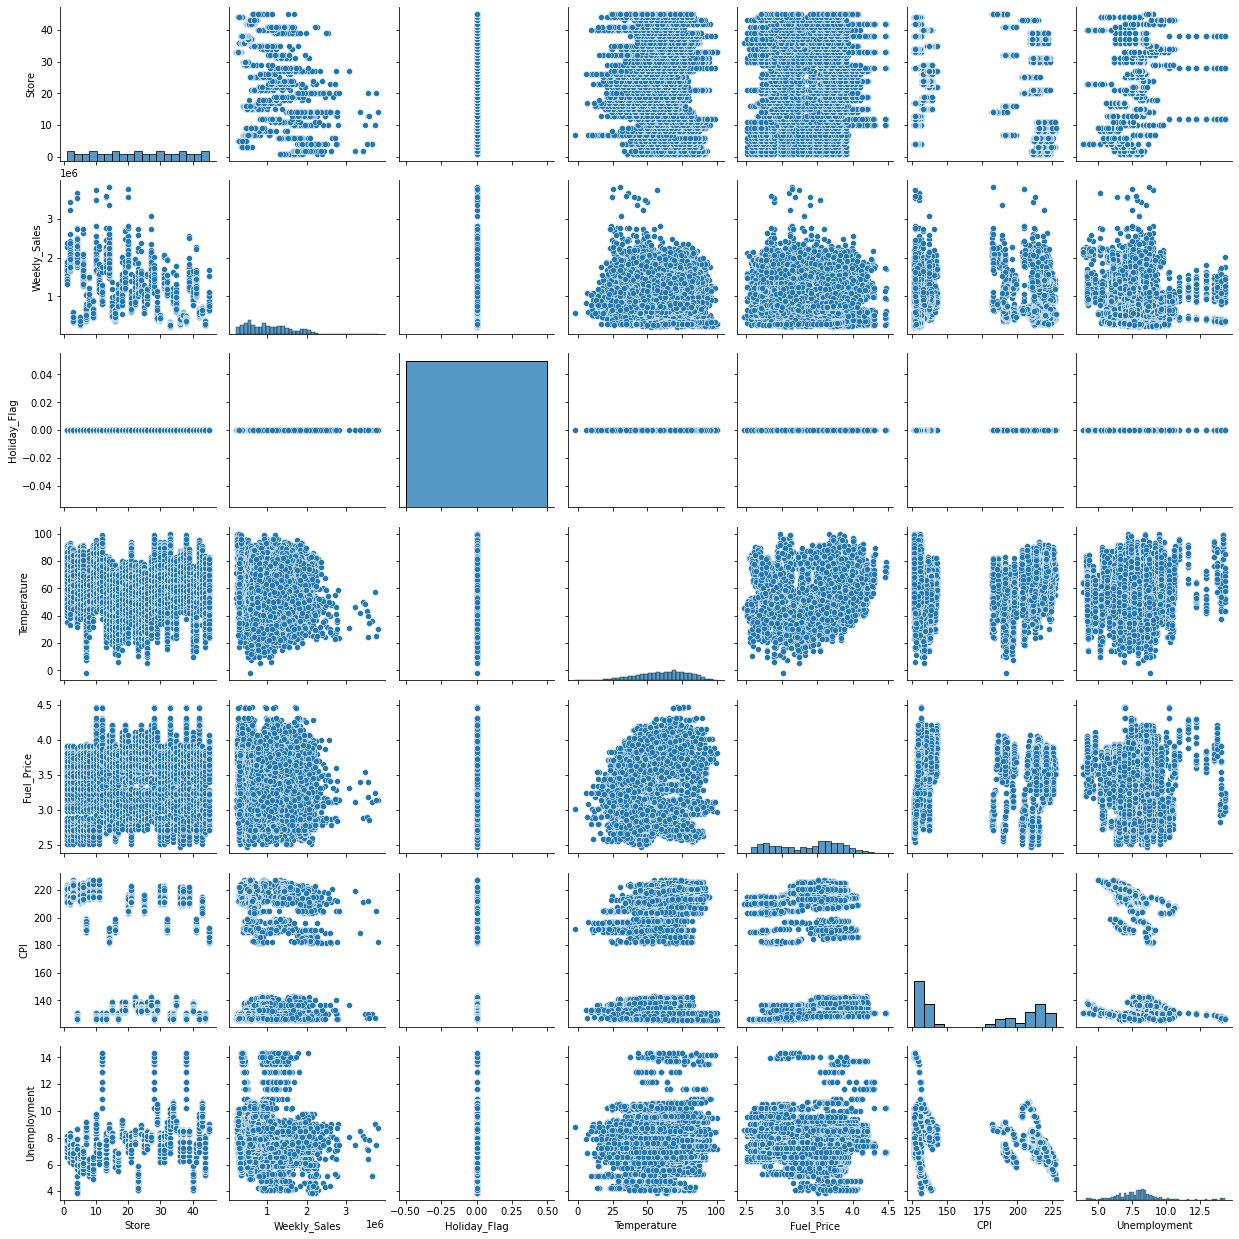

In [5]:
df = df.sort_values(by=["Store"])
df.head()
filt1= (df["Holiday_Flag"] == 0)
df1= df.loc[filt1]
sns.pairplot(df1)

### With the mutiple regression analysis plot, we can see that there is no linear relation between Sales and other variables 

## Quick analysis on regression relashionships on Store 36

In [6]:
filt2 = (df["Holiday_Flag"] == 0) & (df["Store"] == 36)
df2 = df.loc[filt2]
df2


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5096,36,2011-11-04,313387.11,0,58.97,3.287,216.563434,7.716
5097,36,2011-11-11,328498.92,0,63.50,3.254,216.721737,7.716
5098,36,2011-11-18,332901.94,0,66.28,3.260,216.939586,7.716
5100,36,2011-12-02,293350.51,0,53.57,3.164,217.422921,7.716
5101,36,2011-12-09,312298.37,0,50.64,3.147,217.664588,7.716
...,...,...,...,...,...,...,...,...
5051,36,2010-12-24,422093.59,0,59.10,2.863,210.180560,8.476
5053,36,2011-01-07,384659.85,0,54.11,2.942,210.184236,8.395
5054,36,2011-01-14,410497.73,0,42.87,2.971,210.237973,8.395
5055,36,2011-01-21,399191.05,0,51.18,2.980,210.603107,8.395


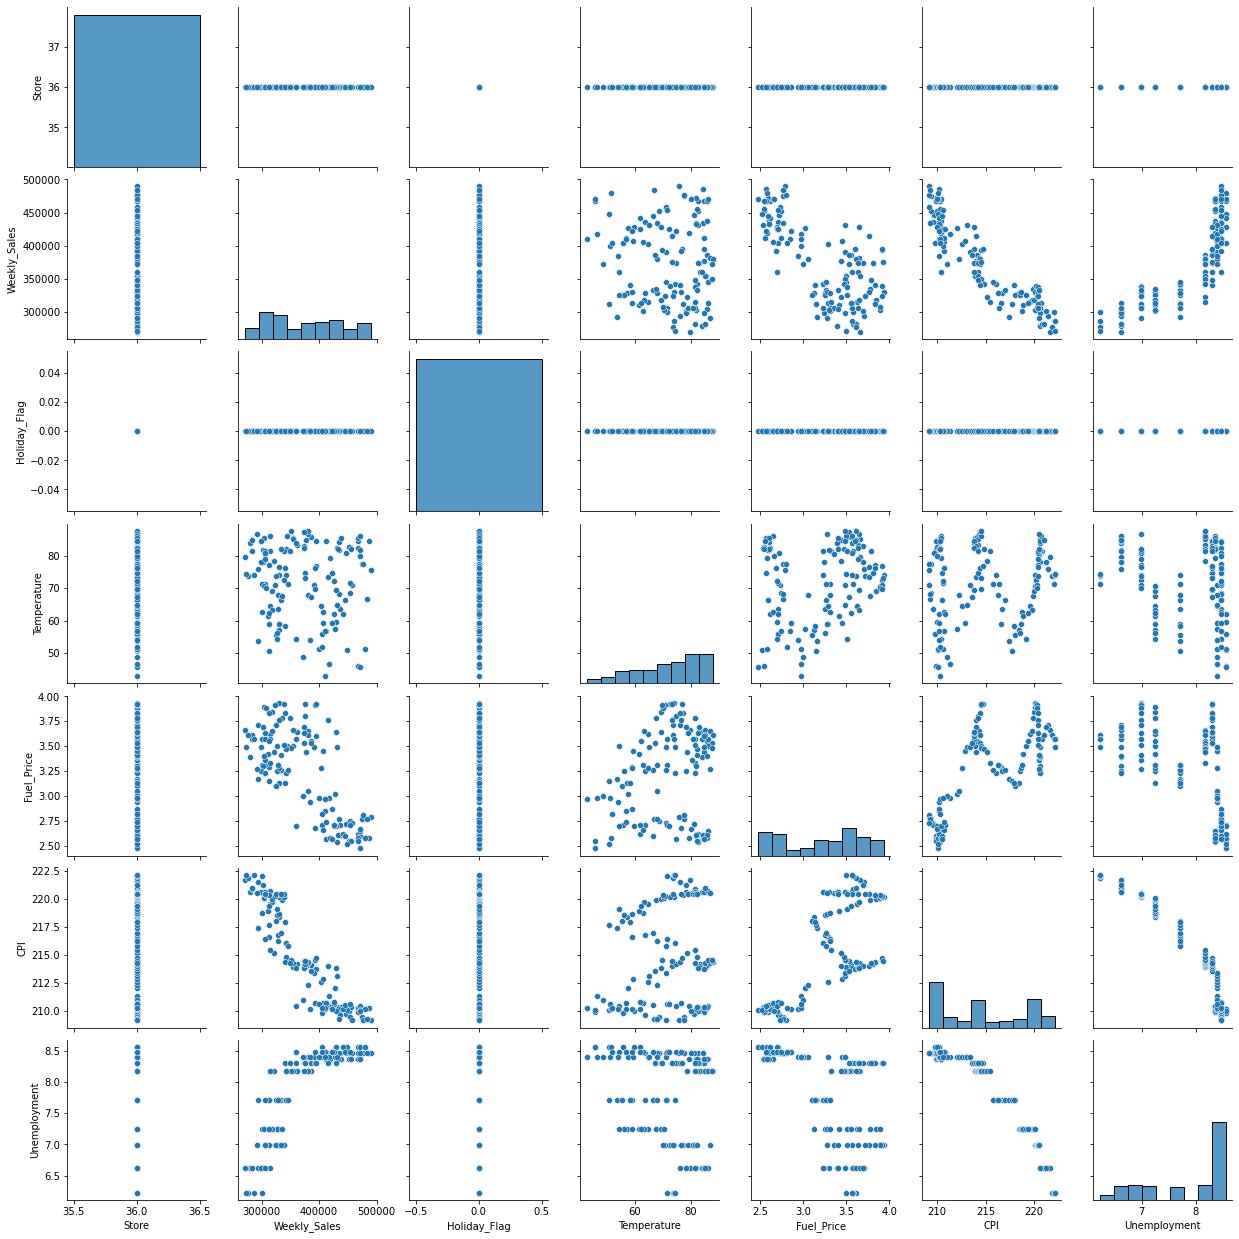

In [10]:
sns.pairplot(df2)

<AxesSubplot:>

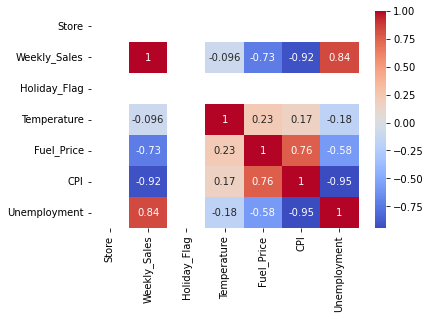

In [11]:
sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")

### But on the store 36, we can see that there might be a linear relation between Sales, CPI, Fuel Price and Unemployment. As CPI, Fuel Price and Unemployment are 3 economic indicators that influetial between each other, I decide to take only CPI to analyze linear regression with Sales 

In [12]:
df_St36 = df2[["Weekly_Sales","CPI",]]
df_St36

,Weekly_Sales,CPI
5096,313387.11,216.563434
5097,328498.92,216.721737
5098,332901.94,216.939586
5100,293350.51,217.422921
5101,312298.37,217.664588
...,...,...
5051,422093.59,210.180560
5053,384659.85,210.184236
5054,410497.73,210.237973
5055,399191.05,210.603107


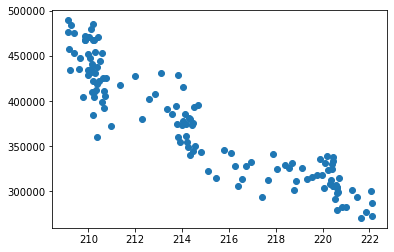

In [13]:
plt.scatter (x = df_St36.CPI, y = df_St36.Weekly_Sales)

In [14]:
x_train, x_test, y_train, y_test = train_test_split (df_St36.CPI, df_St36.Weekly_Sales)

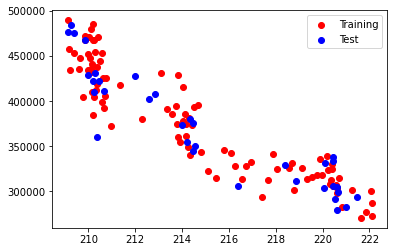

In [15]:
plt.scatter (x = x_train, y = y_train, label ="Training", color ="r")
plt.scatter (x = x_test, y = y_test, label ="Test", color ="b")
plt.legend()

In [16]:
reg = LinearRegression()
reg.fit (x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [17]:
fcst = reg.predict(x_test.values.reshape(-1,1))

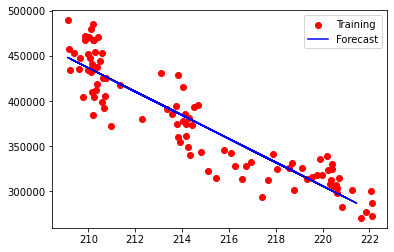

In [18]:
plt.scatter (x = x_train, y = y_train, label ="Training", color ="r")
plt.plot (x_test, fcst, label ="Forecast", color ="b")
plt.legend()
plt.show()

In [19]:
 mod = ols('Weekly_Sales ~ CPI', data=df_St36).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

             df        sum_sq       mean_sq           F        PR(>F)
CPI         1.0  4.156682e+11  4.156682e+11  721.445864  3.987587e-55
Residual  131.0  7.547695e+10  5.761599e+08         NaN           NaN


In [22]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     721.4
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           3.99e-55
Time:                        13:10:21   Log-Likelihood:                -1529.1
No. Observations:                 133   AIC:                             3062.
Df Residuals:                     131   BIC:                             3068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.156e+06   1.04e+05     30.464      0.000    2.95e+06    3.36e+06
CPI        -1.295e+04    482.268    -26.860      0.000   -1.39e+04    -1.2e+04
==============================================================================
Omnibus:                        1.039   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                1.123
Skew:                          -0.199   Prob(JB):                        0.570
Kurtosis:                       2.791   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###   After using the fit function with stat models and Anova table, we see that it is too soon to conclude that there is a causation relationship between CPI and Sales of store 36. From the line plot, we see that the increase of CPI is linear with the decrease of Sales but when looking at it on the macro economics point of view, it seems questionable. In fact, it's true that when the inflation is high, people tend to reduce spending budget while waiting for the revenu the catch up. The decrease in spending budget is therefore on the short term and not on the long run like in the line plot. 

### In my opinion, we should include other factors in this analysis like : Population of the region, Investment by year on store 36, etc.

## Additionnal plots 

eval_env: 1


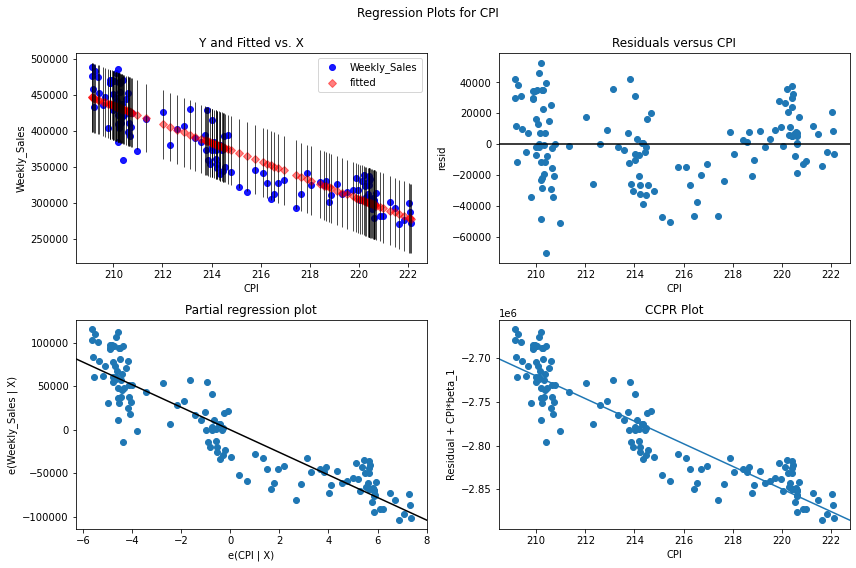

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(mod, 'CPI', fig=fig)